In [95]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib import animation

In [78]:
SHAPE = (300, 500)
board = np.random.randint(0, 2, SHAPE)

In [87]:
def update(*args):
    # Count the neighbors for each cell
    # Edges are wrapped toghter when couting, as though the board were a torus
    left = np.roll(board, 1, axis=1)
    right = np.roll(board, board.shape[1] - 1, axis=1)

    top_left = np.roll(left, 1 , axis=0)
    top_center = np.roll(board, 1, axis=0)
    top_right = np.roll(right, board.shape[1] - 1, axis=0)

    bottom_left = np.roll(left, board.shape[0] -1, axis=0)
    bottom_center = np.roll(board, board.shape[0] -1, axis=0)
    bottom_right = np.roll(right, board.shape[0] -1, axis=0)

    neighbor_counts = ( top_left    + top_center    + top_right
                      + left                        + right
                      + bottom_left + bottom_center + bottom_right)
    
    # Births
    board[neighbor_counts == 3] = 1

    # Deaths
    board[(neighbor_counts < 2) | (neighbor_counts > 3)] = 0
    
    im.set_data(board)

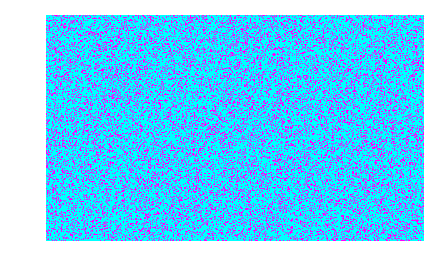

/mnt/c/Users/Anne/Desktop/stats/env/lib/python3.5/site-packages/matplotlib/animation.py:1218: UserWarning: MovieWriter imagemagick unavailable
  warnings.warn("MovieWriter %s unavailable" % writer)


In [97]:
# 75% of our board starts with dead cells
board = np.random.choice([0, 1], SHAPE[0] * SHAPE[1], p=[.75, 0.25]).reshape(SHAPE)

fig = plt.figure(figsize=(5, 3), dpi=100)
im = plt.imshow(board, cmap=plt.cm.cool, interpolation='nearest')
plt.axis('off')
plt.show()

# ani = animation.FuncAnimation(fig, update, interval=100, frames=500)
# Writer = animation.writers['imagemagick']
# ani.save('gol_out.html', writer='imagemagick')